## Reference for Logistic Regression and k-NN implementation 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the pre-split data
train_df = pd.read_csv('csv/pokemon_train.csv')
test_df = pd.read_csv('csv/pokemon_test.csv')

# Prepare features and targets
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Height(m)', 'Weight(kg)']
X_train = train_df[features]

y_train_type = train_df['Primary_Type']
y_train_gen = train_df['Generation']

X_test = test_df[features]
y_test_type = test_df['Primary_Type']
y_test_gen = test_df['Generation']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression for Generation and Type prediction
lr_model_gen = LogisticRegression(multi_class='ovr', max_iter=1000)
lr_model_type = LogisticRegression(multi_class='ovr', max_iter=1000)

lr_model_gen.fit(X_train_scaled, y_train_gen)
lr_model_type.fit(X_train_scaled, y_train_type)

lr_predictions_gen = lr_model_gen.predict(X_test_scaled)
lr_predictions_type = lr_model_type.predict(X_test_scaled)

lr_accuracy_gen = accuracy_score(y_test_gen, lr_predictions_gen)
lr_accuracy_type = accuracy_score(y_test_type, lr_predictions_type)

print("Logistic Regression Results:")
print(f"Accuracy for Generation prediction: {lr_accuracy_gen}")
print(f"Accuracy for Type prediction: {lr_accuracy_type}")
print("\nClassification Report for Generation prediction:")
print(classification_report(y_test_gen, lr_predictions_gen))
print("\nClassification Report for Type prediction:")
print(classification_report(y_test_type, lr_predictions_type))

# K-NN for Generation and Type prediction
knn_model_gen = KNeighborsClassifier(n_neighbors=5)
knn_model_type = KNeighborsClassifier(n_neighbors=5)

knn_model_gen.fit(X_train_scaled, y_train_gen)
knn_model_type.fit(X_train_scaled, y_train_type)

knn_predictions_gen = knn_model_gen.predict(X_test_scaled)
knn_predictions_type = knn_model_type.predict(X_test_scaled)

knn_accuracy_gen = accuracy_score(y_test_gen, knn_predictions_gen)
knn_accuracy_type = accuracy_score(y_test_type, knn_predictions_type)

print("\nK-NN Results:")
print(f"Accuracy for Generation prediction: {knn_accuracy_gen}")
print(f"Accuracy for Type prediction: {knn_accuracy_type}")
print("\nClassification Report for Generation prediction:")
print(classification_report(y_test_gen, knn_predictions_gen))
print("\nClassification Report for Type prediction:")
print(classification_report(y_test_type, knn_predictions_type))

Logistic Regression Results:
Accuracy for Generation prediction: 0.2
Accuracy for Type prediction: 0.22926829268292684

Classification Report for Generation prediction:
              precision    recall  f1-score   support

         1.0       0.24      0.39      0.30        33
         2.0       0.12      0.06      0.08        18
         3.0       0.15      0.19      0.17        26
         4.0       0.05      0.06      0.06        16
         5.0       0.28      0.46      0.34        35
         6.0       0.00      0.00      0.00        12
         7.0       0.25      0.05      0.08        20
         8.0       0.00      0.00      0.00        17
         9.0       0.17      0.14      0.15        28

    accuracy                           0.20       205
   macro avg       0.14      0.15      0.13       205
weighted avg       0.17      0.20      0.17       205


Classification Report for Type prediction:
              precision    recall  f1-score   support

         Bug       0.17    

/Users/marvinchen/Desktop/IW/cos-independent-work/cos397/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/marvinchen/Desktop/IW/cos-independent-work/cos397/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/marvinchen/Desktop/IW/cos-independent-work/cos397/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

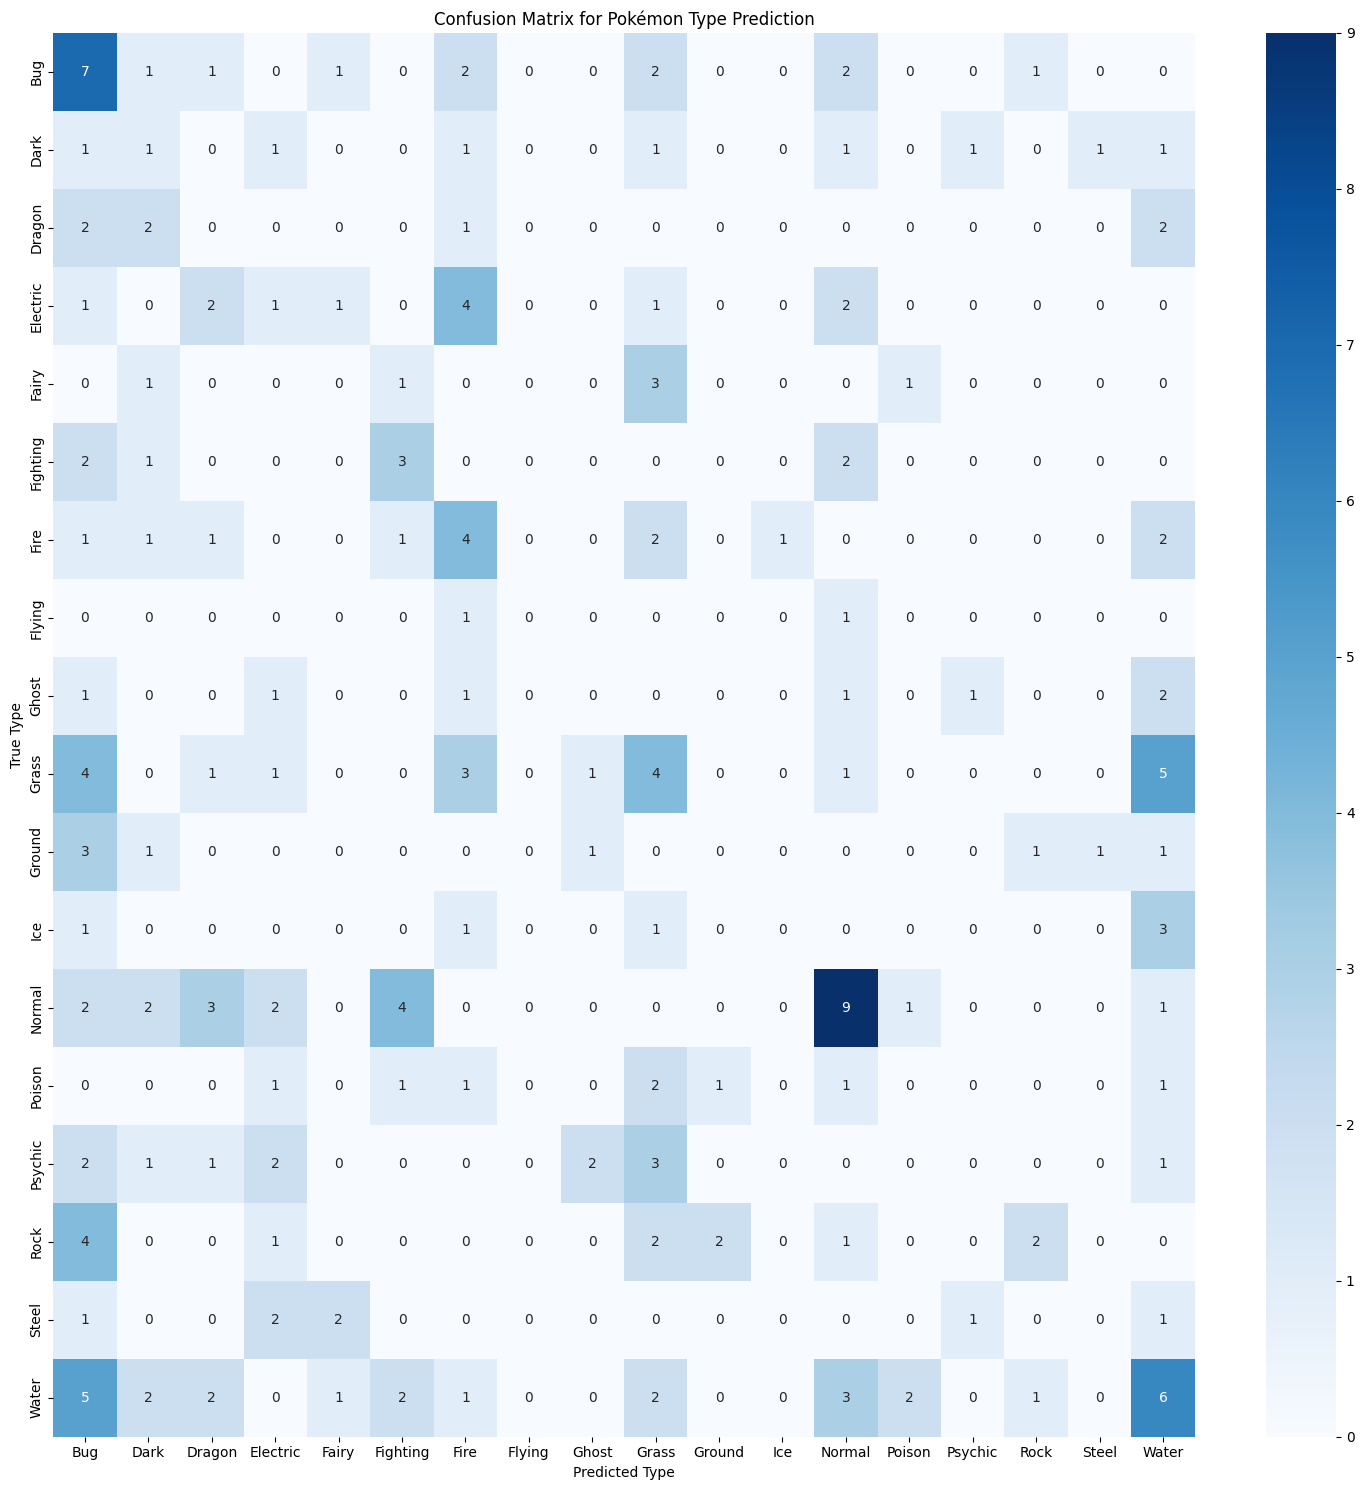

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(15, 15))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix for Pokémon Type Prediction')
    plt.ylabel('True Type')
    plt.xlabel('Predicted Type')
    plt.tight_layout()
    plt.show()

# Get predictions on the test set
y_true = y_test_type  # True labels from your test set
y_pred = knn_model.predict(X_test_scaled)  # Predictions on the test set

# Get unique classes (Pokémon types)
classes = np.unique(y_true)

# Plot the confusion matrix
plot_confusion_matrix(y_true, y_pred, classes)

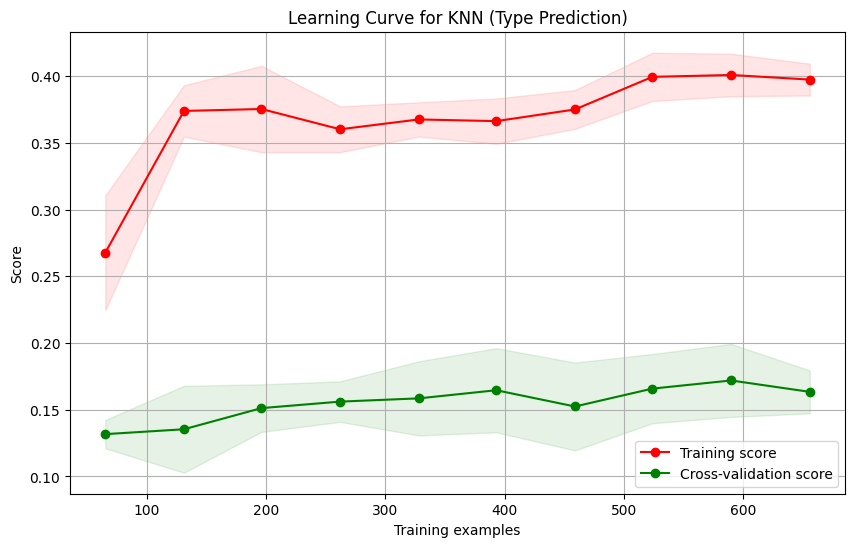

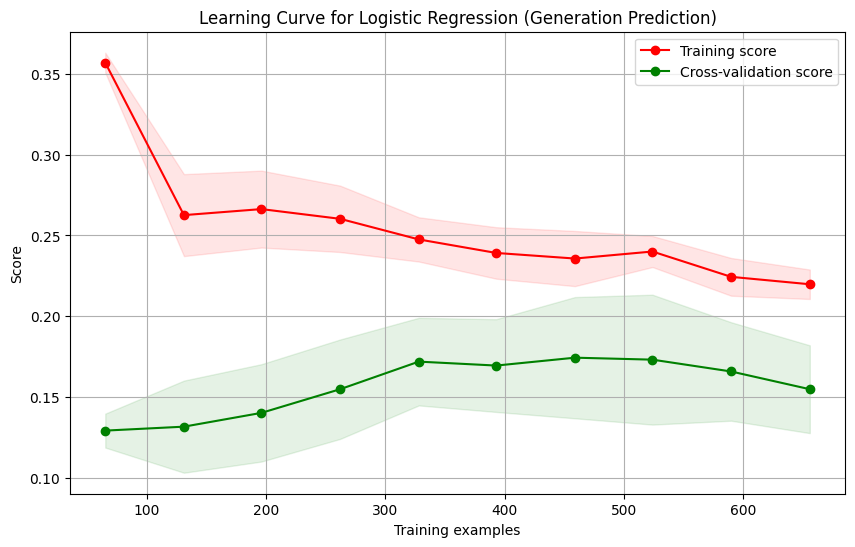

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier # suppress deprecation warning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error

def plot_learning_curve(estimator, X, y, title, scoring):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring=scoring)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# For KNN model (Type Prediction)
knn = KNeighborsClassifier(n_neighbors=5)
plot_learning_curve(knn, X_train_scaled, y_train_type, "Learning Curve for KNN (Type Prediction)", 'accuracy')

# For Logistic Regression model (Generation Prediction)
# lr = LogisticRegression(multi_class='ovr', max_iter=1000)
lr_model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
plot_learning_curve(lr_model, X_train_scaled, y_train_gen, "Learning Curve for Logistic Regression (Generation Prediction)", 'accuracy')

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV

# Load the entire dataset
df = pd.read_csv('csv/pokemon.csv')

# Prepare features and targets
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Height(m)', 'Weight(kg)']
X = df[features]
y_type = df['Primary_Type']
y_gen = df['Generation']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define models
lr_base = LogisticRegression(max_iter=1000)
lr_model = OneVsRestClassifier(lr_base)
knn_model = KNeighborsClassifier()

# Define parameter grids
lr_params = {'estimator__C': [0.1, 1, 10], 'estimator__solver': ['lbfgs', 'liblinear']}
knn_params = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# Function to perform cross-validation and hyperparameter tuning
def tune_and_evaluate(model, params, X, y, task):
    # Baseline cross-validation
    baseline_cv = cross_val_score(model, X, y, cv=5)
    print(f"\nBaseline {task} - CV Accuracy: {baseline_cv.mean():.4f} (+/- {baseline_cv.std() * 2:.4f})")
    
    # Hyperparameter tuning
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X, y)
    
    # Best model after tuning
    best_model = grid.best_estimator_
    
    # Cross-validation with best model
    best_cv = cross_val_score(best_model, X, y, cv=5)
    print(f"Tuned {task} - CV Accuracy: {best_cv.mean():.4f} (+/- {best_cv.std() * 2:.4f})")
    print(f"Best parameters: {grid.best_params_}")
    print(f"Improvement: {best_cv.mean() - baseline_cv.mean():.4f}")
    
    return best_model

# Logistic Regression for Type prediction
print("Logistic Regression - Type Prediction")
lr_type_best = tune_and_evaluate(lr_model, lr_params, X_scaled, y_type, "LR Type")

# Logistic Regression for Generation prediction
print("\nLogistic Regression - Generation Prediction")
lr_gen_best = tune_and_evaluate(lr_model, lr_params, X_scaled, y_gen, "LR Generation")

# K-NN for Type prediction
print("\nK-NN - Type Prediction")
knn_type_best = tune_and_evaluate(knn_model, knn_params, X_scaled, y_type, "KNN Type")

# K-NN for Generation prediction
print("\nK-NN - Generation Prediction")
knn_gen_best = tune_and_evaluate(knn_model, knn_params, X_scaled, y_gen, "KNN Generation")

Logistic Regression - Type Prediction

Baseline LR Type - CV Accuracy: 0.2146 (+/- 0.0309)
Tuned LR Type - CV Accuracy: 0.2146 (+/- 0.0309)
Best parameters: {'estimator__C': 1, 'estimator__solver': 'lbfgs'}
Improvement: 0.0000

Logistic Regression - Generation Prediction

Baseline LR Generation - CV Accuracy: 0.1795 (+/- 0.0914)
Tuned LR Generation - CV Accuracy: 0.1795 (+/- 0.0914)
Best parameters: {'estimator__C': 1, 'estimator__solver': 'lbfgs'}
Improvement: 0.0000

K-NN - Type Prediction

Baseline KNN Type - CV Accuracy: 0.1717 (+/- 0.0514)
Tuned KNN Type - CV Accuracy: 0.2000 (+/- 0.0436)
Best parameters: {'n_neighbors': 7, 'weights': 'distance'}
Improvement: 0.0283

K-NN - Generation Prediction

Baseline KNN Generation - CV Accuracy: 0.1522 (+/- 0.0406)
Tuned KNN Generation - CV Accuracy: 0.1668 (+/- 0.0298)
Best parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Improvement: 0.0146


Logistic Regression - Type Prediction


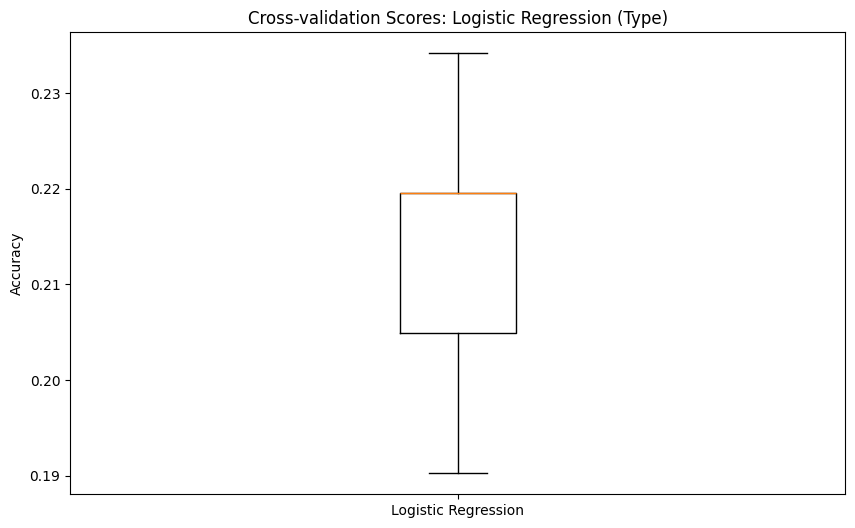

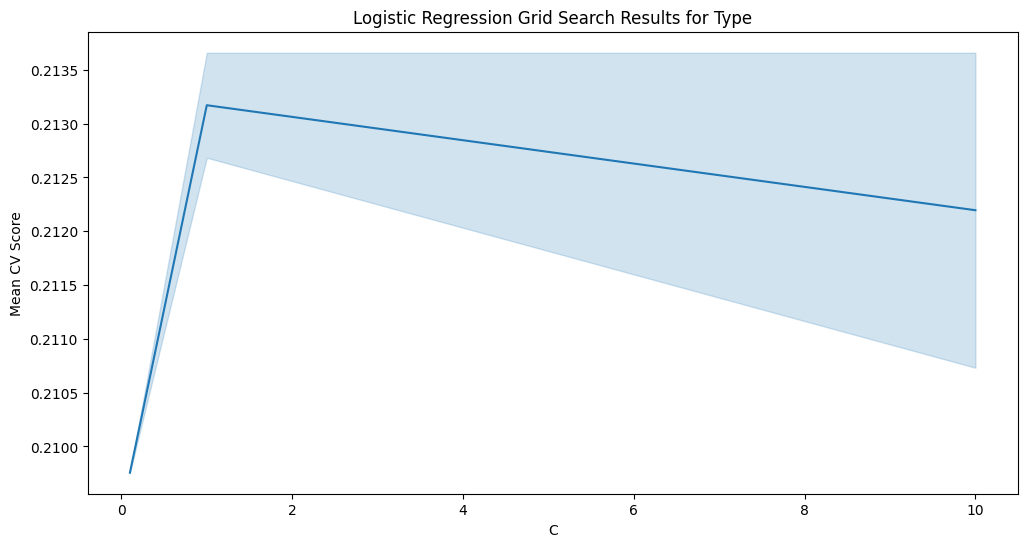


Logistic Regression - Generation Prediction


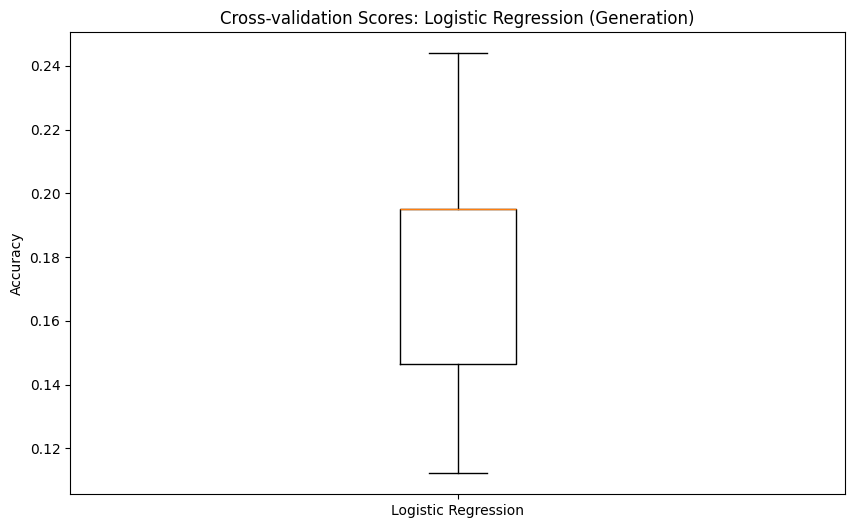

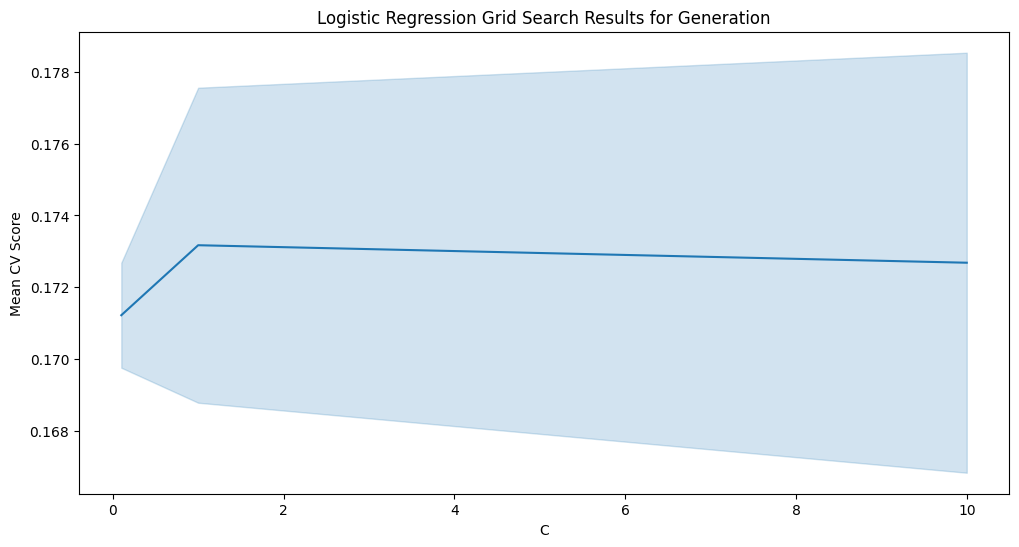


K-NN - Type Prediction


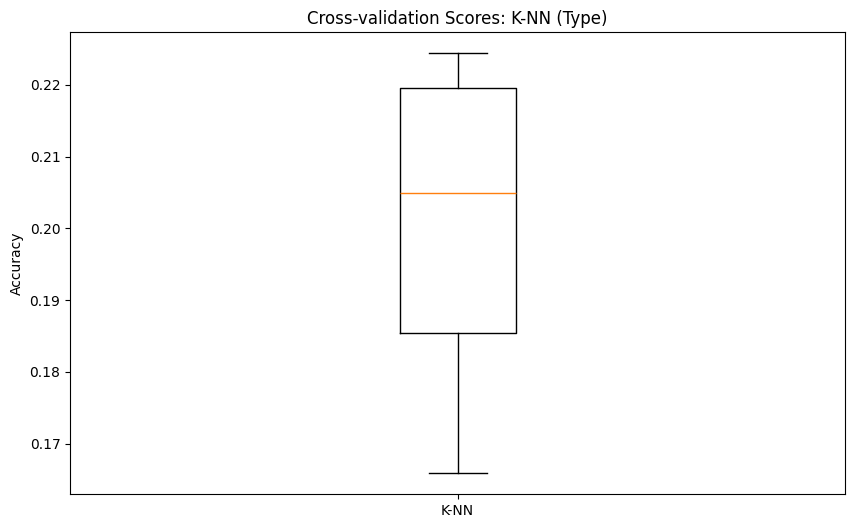

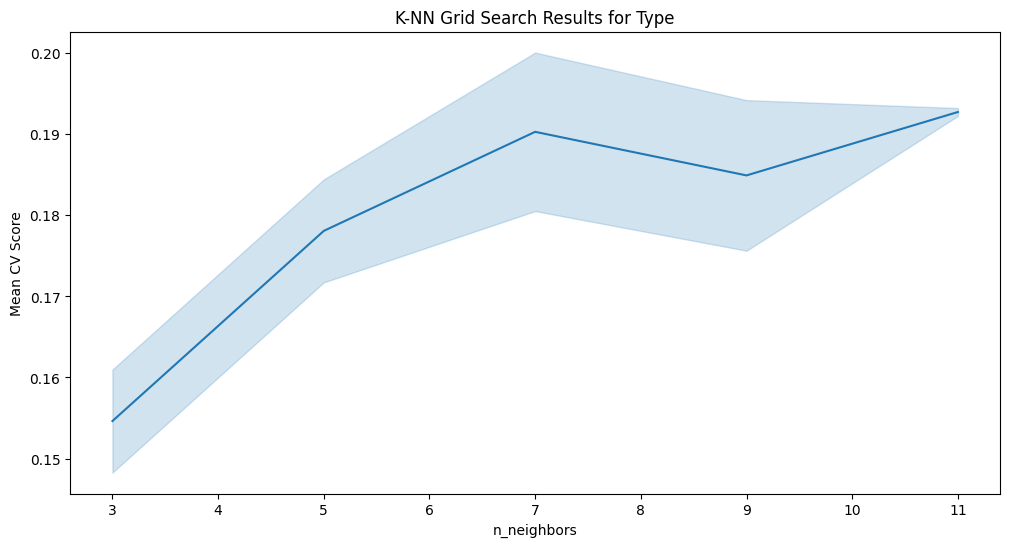


K-NN - Generation Prediction


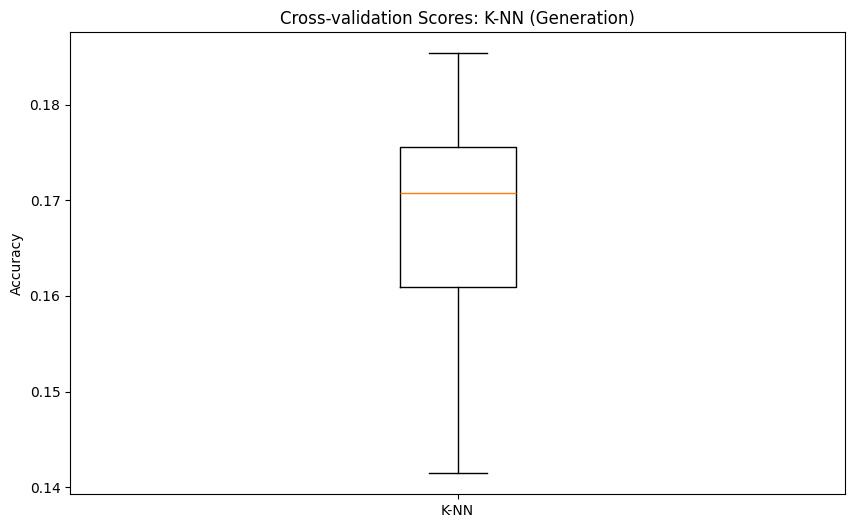

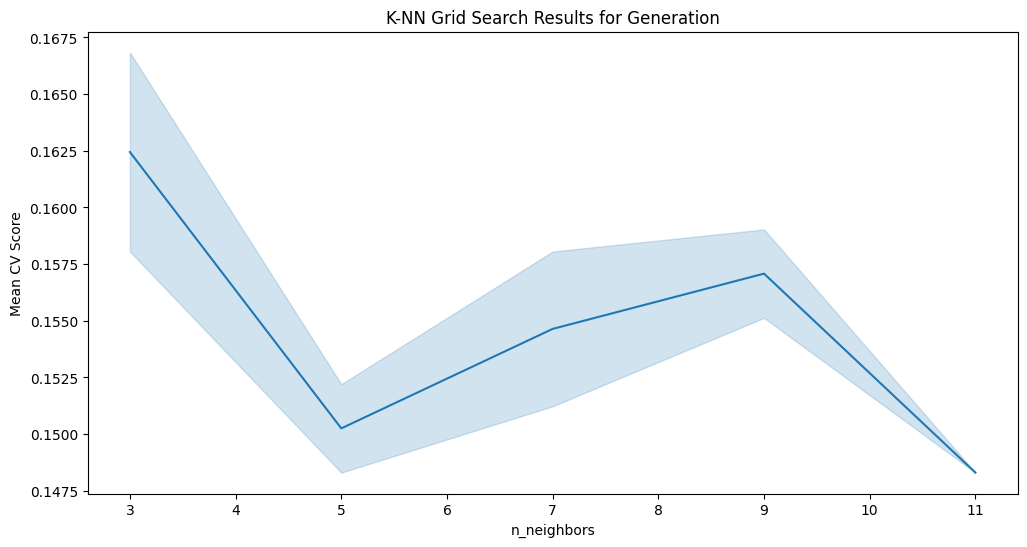

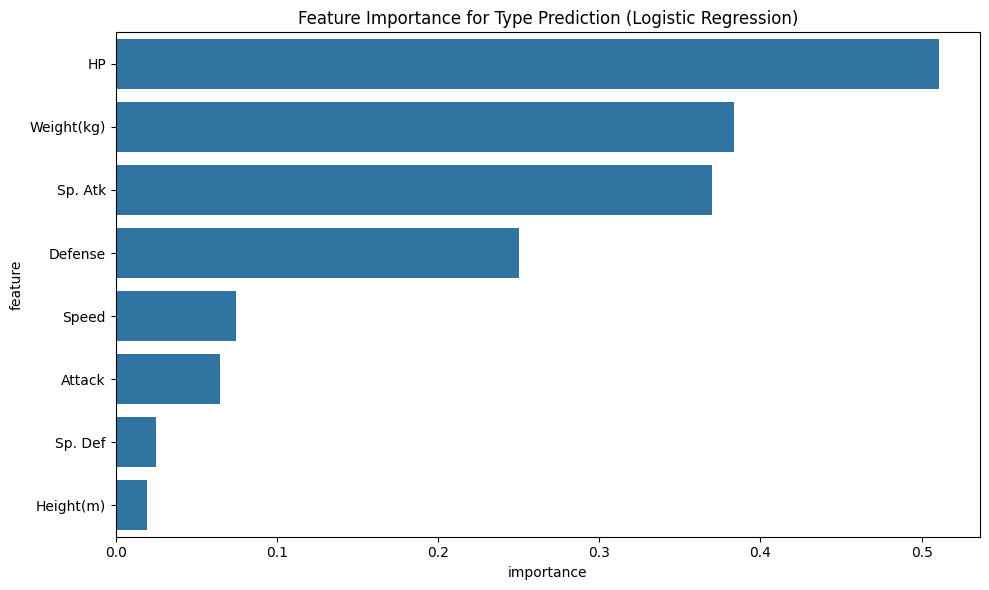

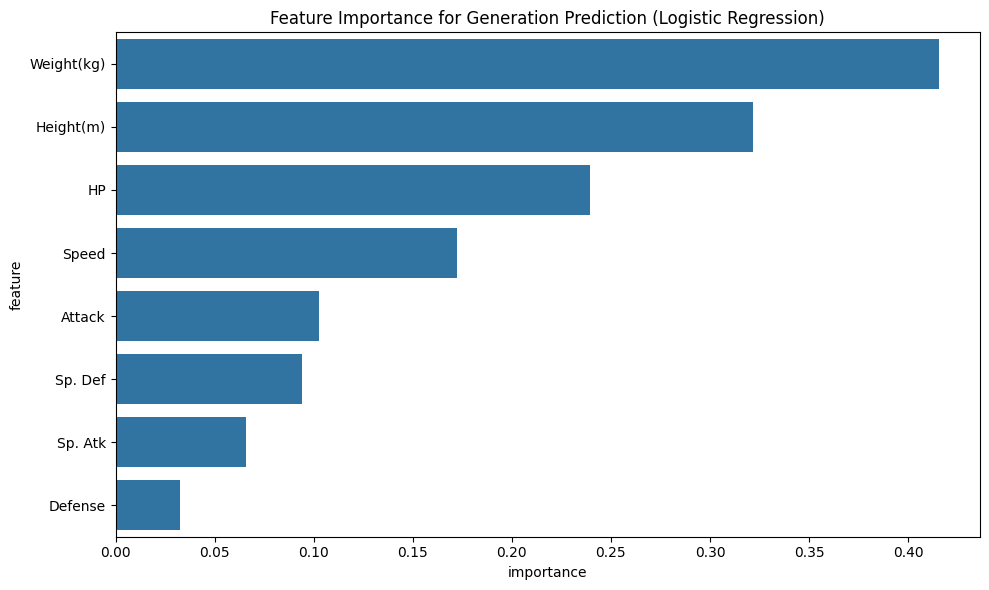

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Load the data
df = pd.read_csv('csv/pokemon.csv')

# Prepare features and targets
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Height(m)', 'Weight(kg)']
X = df[features]
y_type = df['Primary_Type']
y_gen = df['Generation']

# Encode targets
le_type = LabelEncoder()
le_gen = LabelEncoder()
y_type_encoded = le_type.fit_transform(y_type)
y_gen_encoded = le_gen.fit_transform(y_gen)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define models and parameters
lr_model = LogisticRegression(max_iter=1000)
knn_model = KNeighborsClassifier()

lr_params = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
knn_params = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# Function to perform grid search and visualize results
def grid_search_and_visualize(model, params, X, y, model_name, target_name):
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X, y)
    
    # Get cross-validation scores
    cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
    
    # Visualize cross-validation scores
    plt.figure(figsize=(10, 6))
    plt.boxplot([cv_scores])
    plt.title(f'Cross-validation Scores: {model_name} ({target_name})')
    plt.ylabel('Accuracy')
    plt.xticks([1], [model_name])
    plt.show()
    
    # Visualize grid search results
    results = pd.DataFrame(grid_search.cv_results_)
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='param_' + list(params.keys())[0], y='mean_test_score', data=results)
    plt.title(f'{model_name} Grid Search Results for {target_name}')
    plt.xlabel(list(params.keys())[0])
    plt.ylabel('Mean CV Score')
    plt.show()
    
    return grid_search.best_estimator_

# Perform grid search for all models and targets
print("Logistic Regression - Type Prediction")
lr_type = grid_search_and_visualize(lr_model, lr_params, X_scaled, y_type_encoded, 'Logistic Regression', 'Type')

print("\nLogistic Regression - Generation Prediction")
lr_gen = grid_search_and_visualize(lr_model, lr_params, X_scaled, y_gen_encoded, 'Logistic Regression', 'Generation')

print("\nK-NN - Type Prediction")
knn_type = grid_search_and_visualize(knn_model, knn_params, X_scaled, y_type_encoded, 'K-NN', 'Type')

print("\nK-NN - Generation Prediction")
knn_gen = grid_search_and_visualize(knn_model, knn_params, X_scaled, y_gen_encoded, 'K-NN', 'Generation')

# Visualize feature importance for Logistic Regression
def plot_feature_importance(model, features, target_name):
    importance = np.abs(model.coef_[0])
    feature_importance = pd.DataFrame({'feature': features, 'importance': importance})
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title(f'Feature Importance for {target_name} Prediction (Logistic Regression)')
    plt.tight_layout()
    plt.show()

plot_feature_importance(lr_type, features, 'Type')
plot_feature_importance(lr_gen, features, 'Generation')

Classification Report:
              precision    recall  f1-score   support

         Bug       1.00      0.17      0.29        18
        Dark       0.00      0.00      0.00        14
      Dragon       0.50      0.06      0.11        16
    Electric       0.00      0.00      0.00        13
       Fairy       0.00      0.00      0.00        11
    Fighting       1.00      0.11      0.20        18
        Fire       0.00      0.00      0.00        17
      Flying       1.00      0.06      0.11        18
       Ghost       0.00      0.00      0.00        11
       Grass       0.33      0.04      0.07        25
      Ground       0.00      0.00      0.00        18
         Ice       0.00      0.00      0.00         7
      Normal       0.00      0.00      0.00        26
      Poison       0.00      0.00      0.00        13
     Psychic       1.00      0.05      0.09        22
        Rock       1.00      0.21      0.35        14
       Steel       0.00      0.00      0.00         9
    

/Users/marvinchen/Desktop/IW/cos-independent-work/cos397/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marvinchen/Desktop/IW/cos-independent-work/cos397/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


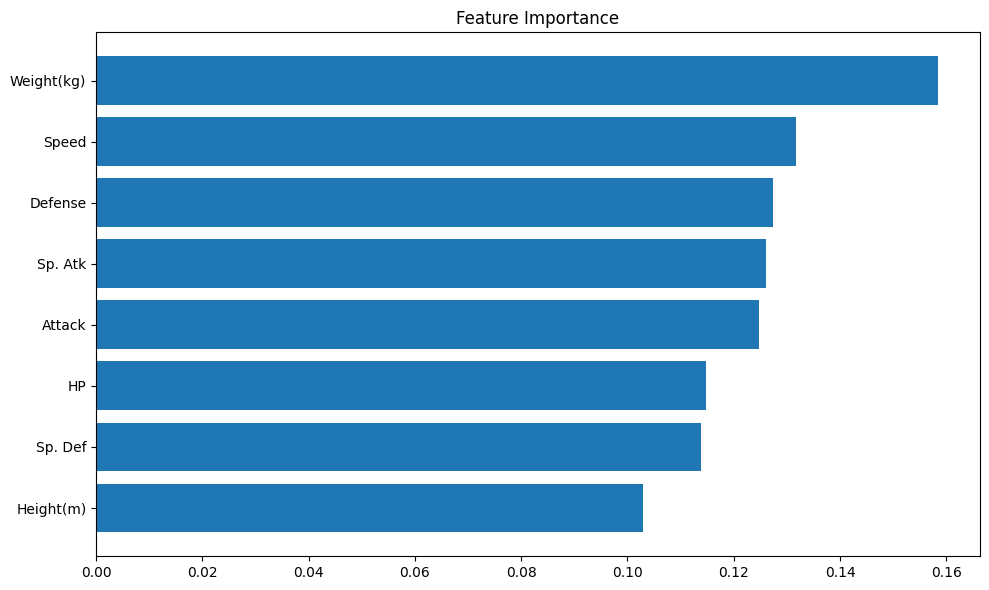

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the pre-split data
train_df = pd.read_csv('csv/pokemon_train.csv')
test_df = pd.read_csv('csv/pokemon_test.csv')

# Prepare features and targets
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Height(m)', 'Weight(kg)']
X_train = train_df[features]
X_test = test_df[features]

# Combine primary and secondary types
def combine_types(row):
    types = [row['Primary_Type']]
    if pd.notna(row['Secondary_Type']) and row['Secondary_Type'] != 'None':
        types.append(row['Secondary_Type'])
    return types

train_df['types'] = train_df.apply(combine_types, axis=1)
test_df['types'] = test_df.apply(combine_types, axis=1)

# Encode target variables
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_df['types'])
y_test = mlb.transform(test_df['types'])

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the multi-output model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
multi_target_rf = MultiOutputClassifier(rf_classifier, n_jobs=-1)
multi_target_rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = multi_target_rf.predict(X_test_scaled)

# Function to get top two types
def get_top_two_types(pred):
    return [mlb.classes_[np.argsort(p)[-2:]] for p in pred]

# Get predictions
predictions = get_top_two_types(y_pred)
true_types = [t for t in test_df['types']]

# Evaluate the model
print("Classification Report:")
print(classification_report(mlb.transform(true_types), y_pred, target_names=mlb.classes_))

# Calculate overall accuracy
accuracy = accuracy_score(mlb.transform(true_types), y_pred)
print(f"\nOverall Accuracy: {accuracy:.4f}")

# Feature Importance
feature_importance = np.mean([tree.feature_importances_ for tree in multi_target_rf.estimators_], axis=0)
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(pos, feature_importance[sorted_idx], align='center')
ax.set_yticks(pos)
ax.set_yticklabels(np.array(features)[sorted_idx])
ax.set_title('Feature Importance')
plt.tight_layout()
plt.show()

# incorrect confusion matrix 
# # Confusion Matrix for Primary Type
# primary_true = [t[0] for t in true_types]
# primary_pred = [p[0] for p in predictions]
# cm = pd.crosstab(pd.Series(primary_true, name='Actual'), 
#                  pd.Series(primary_pred, name='Predicted'))
# plt.figure(figsize=(12, 10))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix for Primary Type')
# plt.show()